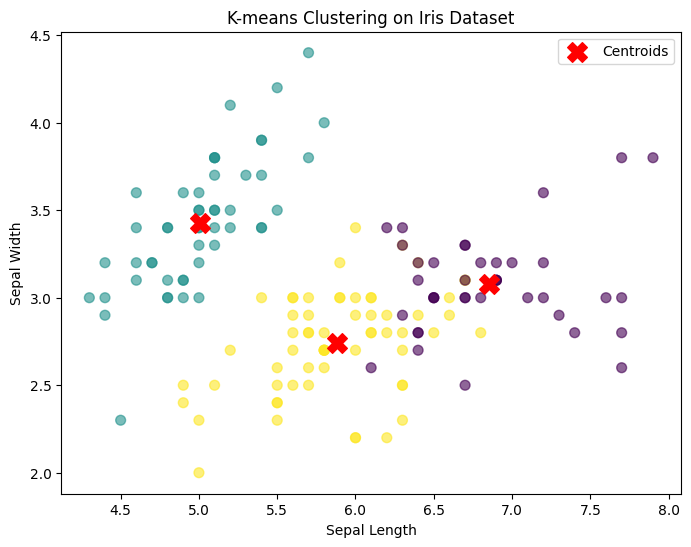

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data

# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, 
            label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering on Iris Dataset')
plt.legend()
plt.show()

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

kmedoids = KMedoids(n_clusters=3, metric="manhattan", random_state=42)
kmedoids.fit(X)

labels = kmedoids.labels_
medoids = kmedoids.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2', s=50, alpha=0.6)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='*', s=300, label='Medoids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-medoids Clustering on Iris Dataset')
plt.legend()
plt.show()


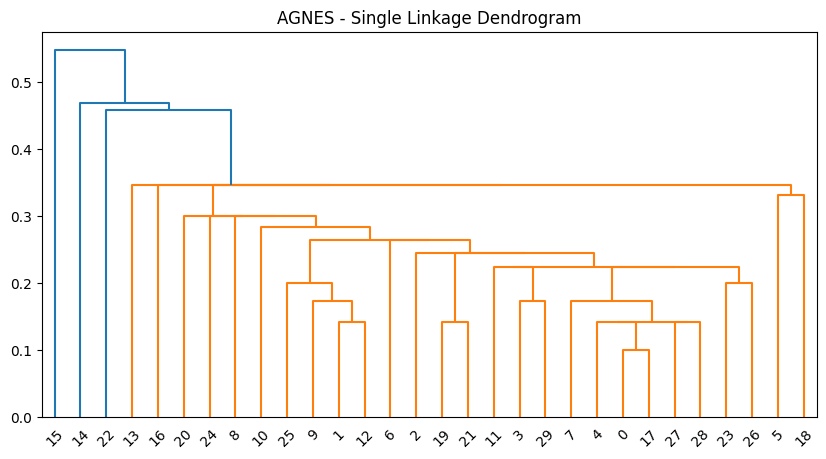

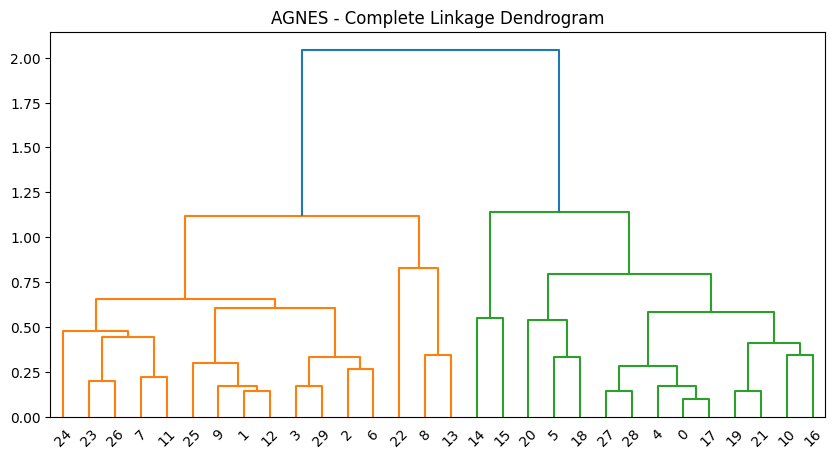

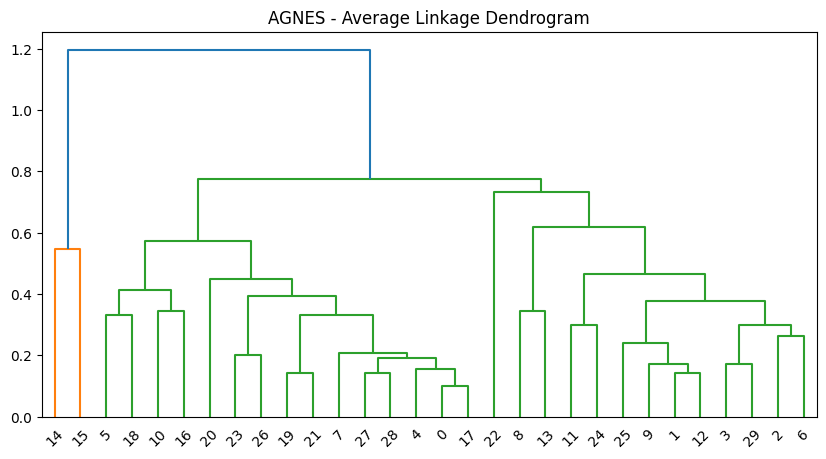

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data[:30]  # Use subset for clear visualization

# Single linkage
single_linkage = linkage(X, method='single')
plt.figure(figsize=(10, 5))
dendrogram(single_linkage)
plt.title('AGNES - Single Linkage Dendrogram')
plt.show()

# Complete linkage
complete_linkage = linkage(X, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(complete_linkage)
plt.title('AGNES - Complete Linkage Dendrogram')
plt.show()

# Average linkage
average_linkage = linkage(X, method='average')
plt.figure(figsize=(10, 5))
dendrogram(average_linkage)
plt.title('AGNES - Average Linkage Dendrogram')
plt.show()


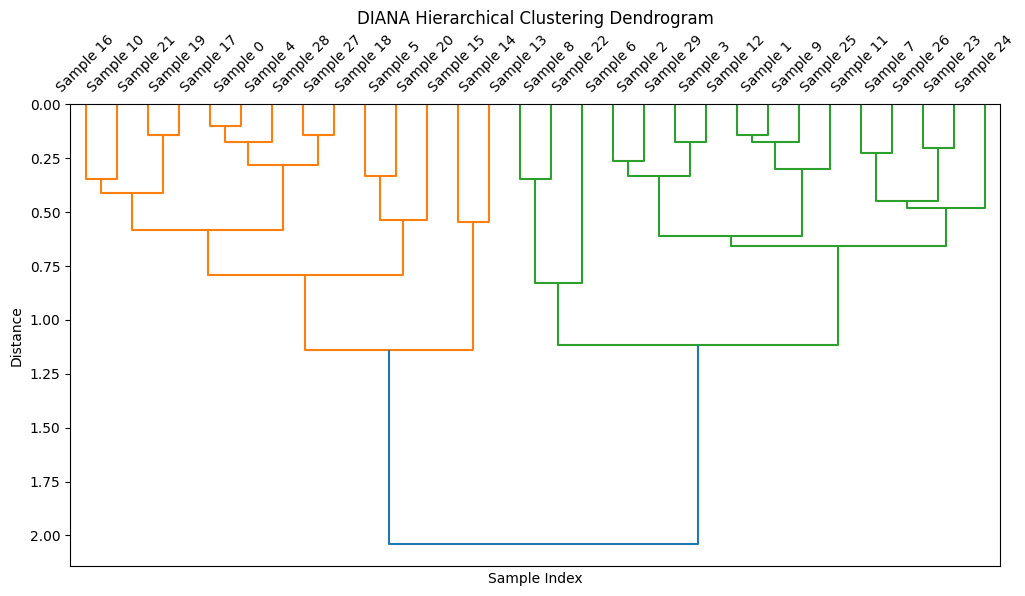

Cluster assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [14]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data[:30]

# For DIANA simulation (Scipy implements divisive through linkage)
# We'll use complete linkage for demonstration
Z = linkage(X, method='complete', metric='euclidean')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, orientation='bottom', 
           labels=[f'Sample {i}' for i in range(len(X))],
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('DIANA Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=3.5, color='r', linestyle='--')
plt.show()

# Cut dendrogram to get clusters
clusters = fcluster(Z, t=3.5, criterion='distance')
print(f'Cluster assignments: {clusters}')


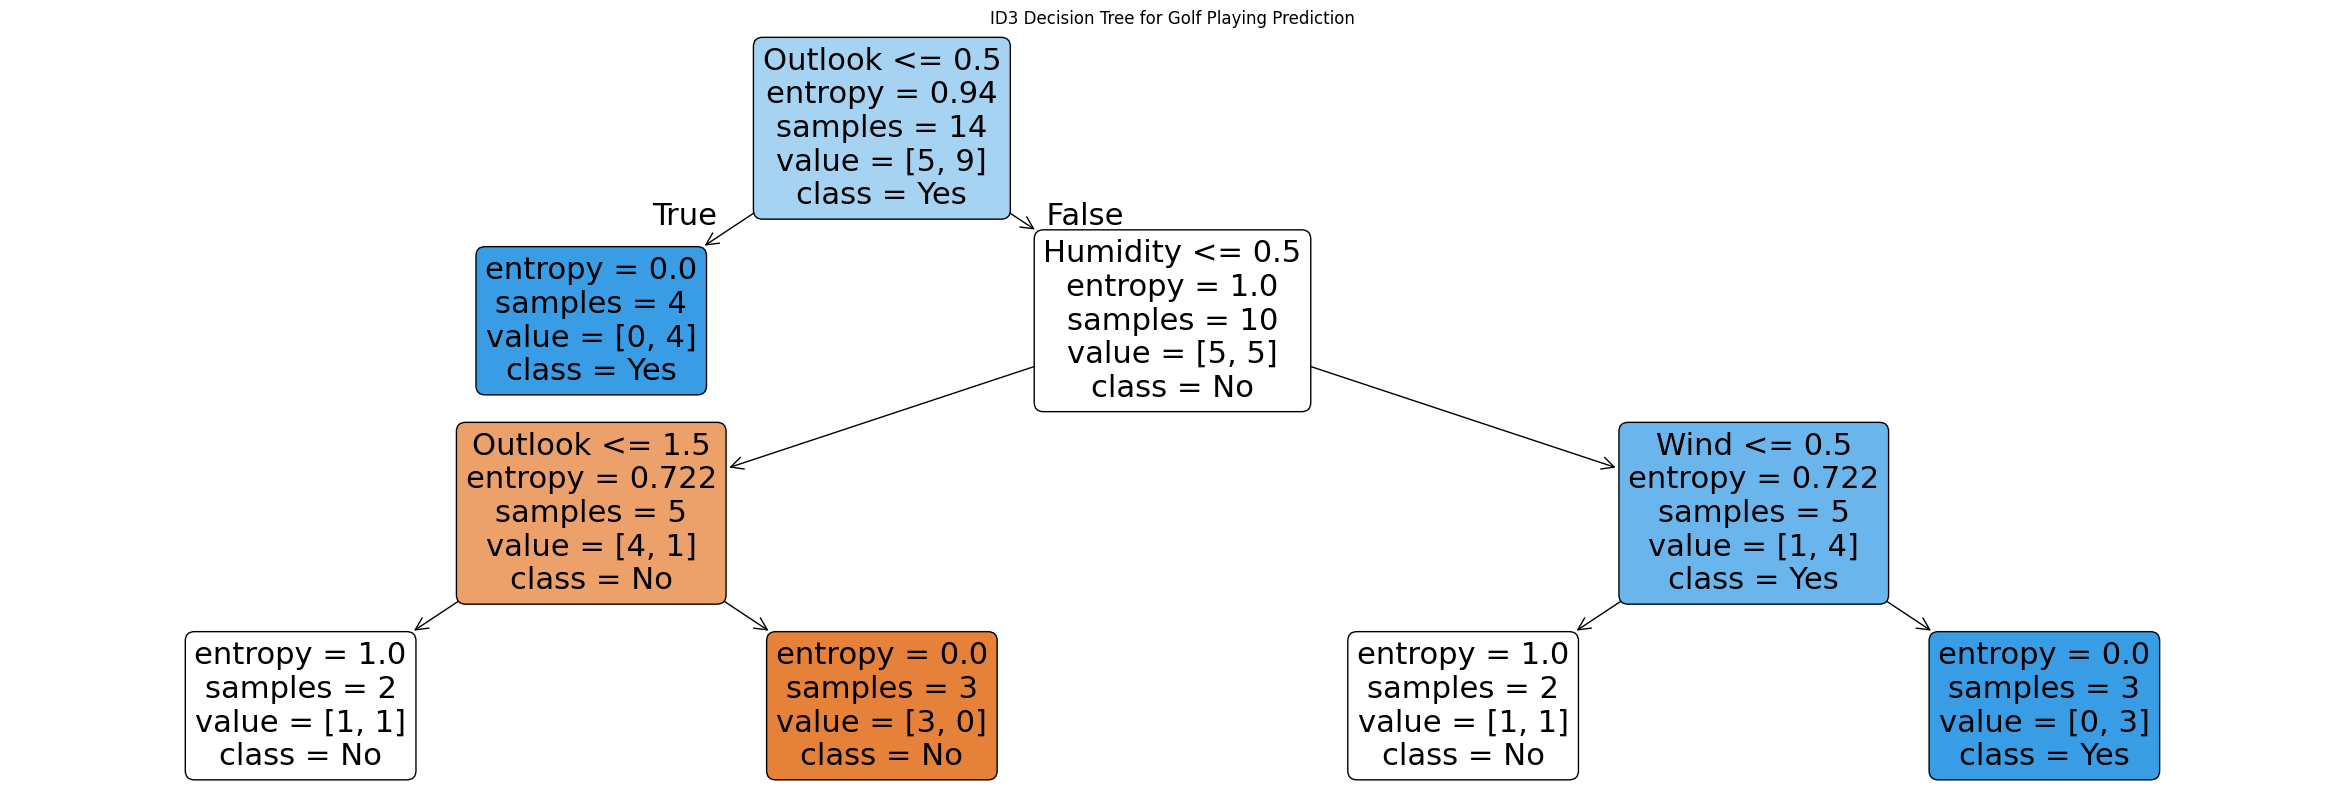

Prediction: Don't Play Golf


In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Golf dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 
                'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 
                'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                   'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 
                'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High',
                'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
            'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayGolf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
                'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('PlayGolf', axis=1)
y = df['PlayGolf']

# Build ID3 tree (using entropy)
id3_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
id3_tree.fit(X, y)

# Visualize tree
plt.figure(figsize=(30, 10))
plot_tree(id3_tree, 
          feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'],
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True)
plt.title('ID3 Decision Tree for Golf Playing Prediction')
plt.show()

# Make prediction
sample = pd.DataFrame([[2, 0, 0, 1]],  # Rain, Hot, High, Strong
                      columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])
prediction = id3_tree.predict(sample)
print(f'Prediction: {"Play Golf" if prediction[0] == 1 else "Don\'t Play Golf"}')


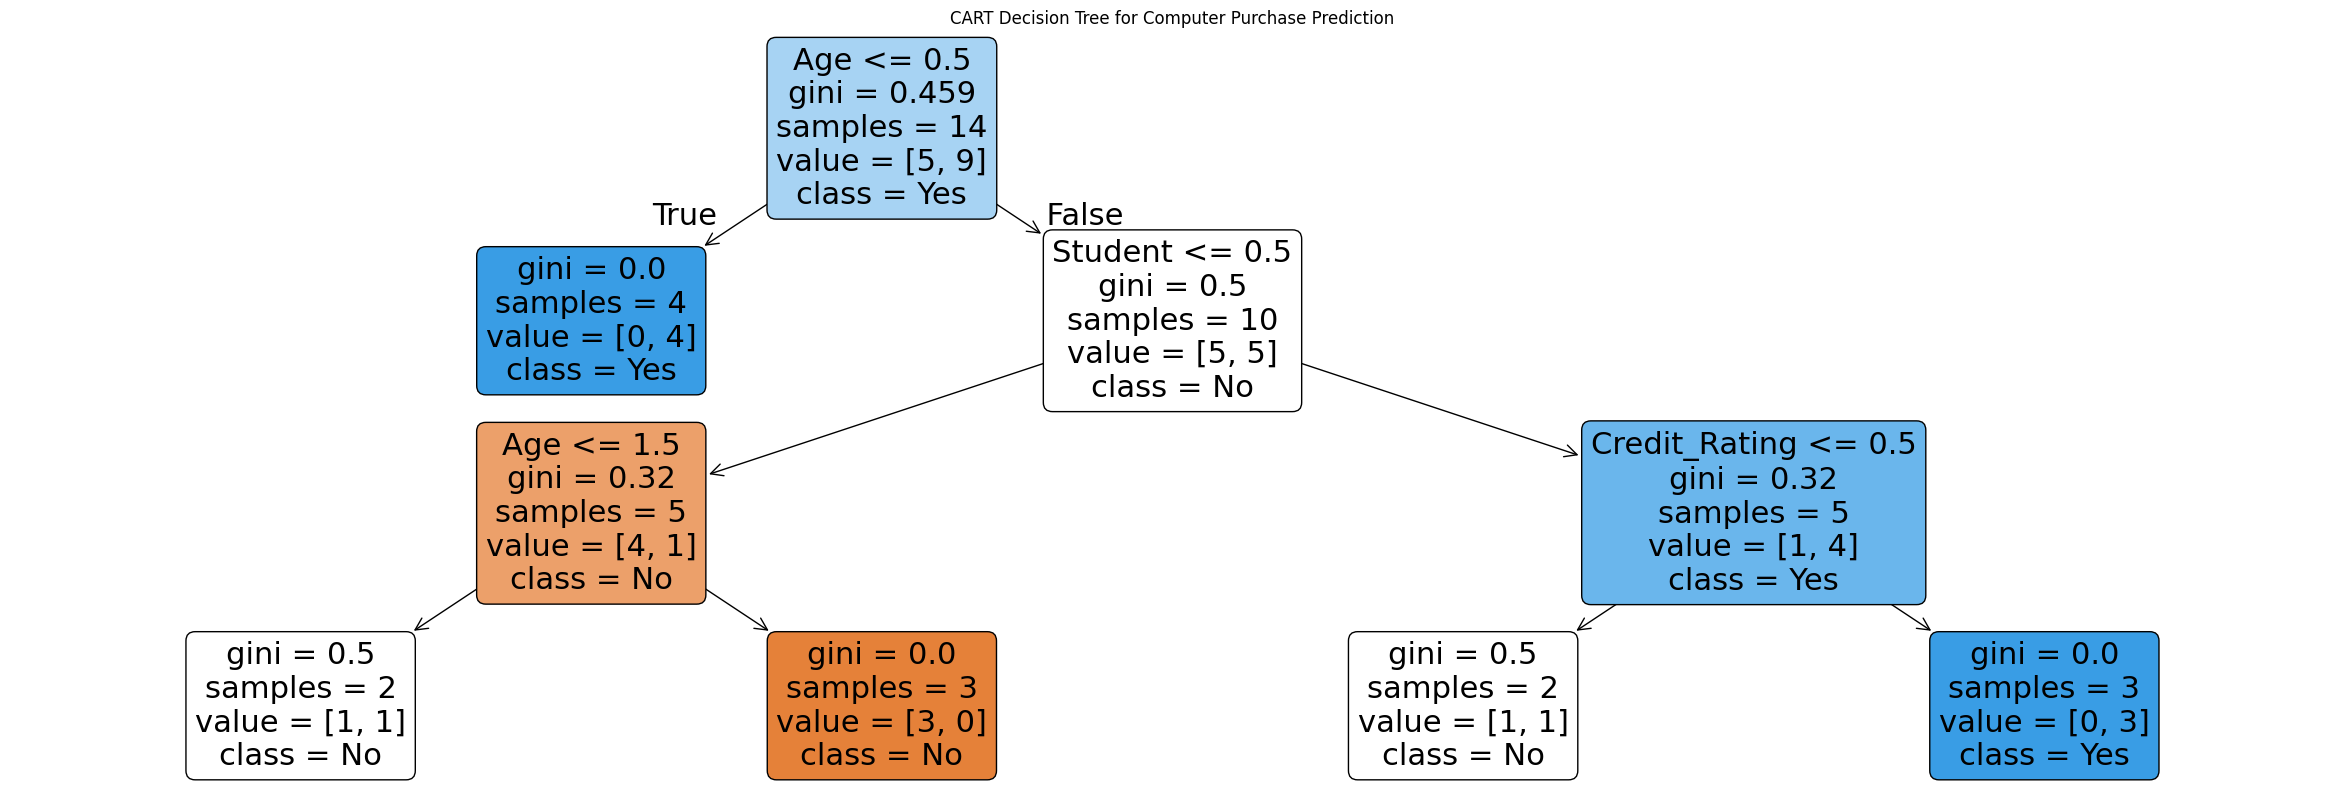

Training Accuracy: 0.86


In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# Buy Computer dataset
data = {
    'Age': ['Youth', 'Youth', 'Middle', 'Senior', 'Senior', 'Senior', 
            'Middle', 'Youth', 'Youth', 'Senior', 'Youth', 'Middle', 
            'Middle', 'Senior'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Medium',
              'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
               'Yes', 'Yes', 'No', 'Yes', 'No'],
    'Credit_Rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent',
                     'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 
                     'Excellent', 'Fair', 'Excellent'],
    'Buy_Computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
                    'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('Buy_Computer', axis=1)
y = df['Buy_Computer']

# Build CART tree (using Gini)
cart_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
cart_tree.fit(X, y)

# Visualize tree
plt.figure(figsize=(30, 10))
plot_tree(cart_tree,
          feature_names=['Age', 'Income', 'Student', 'Credit_Rating'],
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True)
plt.title('CART Decision Tree for Computer Purchase Prediction')
plt.show()

# Evaluate
accuracy = cart_tree.score(X, y)
print(f'Training Accuracy: {accuracy:.2f}')

In [20]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Using the same Buy Computer dataset from Assignment 6
# Assuming df and X, y are already prepared

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

# Gaussian Naïve Bayes (for continuous/ordinal features)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')

# Test on unknown sample
unknown_sample = pd.DataFrame([[1, 0, 1, 0]],  # Middle, High, Student, Fair
                             columns=['Age', 'Income', 'Student', 'Credit_Rating'])
prediction = gnb.predict(unknown_sample)
print(f'\nPrediction for unknown sample: {"Buy" if prediction[0] == 1 else "Don\'t Buy"}')


Accuracy: 0.600
Confusion Matrix:
[[1 1]
 [1 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5


Prediction for unknown sample: Buy


In [21]:
import numpy as np
class NeuralNetwork:
    def __init__(self, topology, learning_rate=0.5):
        self.topology = topology
        self.lr = learning_rate
        self.weights = []
        self.biases = []
    
        # Initialize weights and biases
        for i in range(len(topology)-1):
            w = np.zeros((topology[i], topology[i+1]))
            b = np.zeros(topology[i+1])
            self.weights.append(w)
            self.biases.append(b)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        activations = [X]
        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            a = self.sigmoid(z)
            activations.append(a)
        return activations
    
    def backward(self, X, y, activations):
        # Calculate errors
        errors = [y - activations[-1]]
        deltas = [errors[-1] * self.sigmoid_derivative(activations[-1])]
        
        # Backpropagate
        for i in range(len(self.weights)-1, 0, -1):
            error = deltas[-1].dot(self.weights[i].T)
            delta = error * self.sigmoid_derivative(activations[i])
            errors.append(error)
            deltas.append(delta)
        
        # Reverse deltas for weight update
        deltas.reverse()
        
        # Update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] += self.lr * activations[i].T.dot(deltas[i])
            self.biases[i] += self.lr * np.sum(deltas[i], axis=0)
    
    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            activations = self.forward(X)
            self.backward(X, y, activations)
            
            if epoch % 100 == 0:
                loss = np.mean((y - activations[-1]) ** 2)
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

# Sample data
X = np.array([[1, 0, 1]])  # Input sample
y = np.array([[1, 0]])     # Target output

# Create network with topology 3-2-2-2
nn = NeuralNetwork(topology=[3, 2, 2, 2], learning_rate=0.5)

# Train network
print("Training Neural Network...")
nn.train(X, y, epochs=1000)

# Test prediction
activations = nn.forward(X)
print(f'\nInput: {X}')
print(f'Predicted Output: {activations[-1]}')
print(f'Target Output: {y}')


Training Neural Network...
Epoch 0, Loss: 0.2500
Epoch 100, Loss: 0.0078
Epoch 200, Loss: 0.0033
Epoch 300, Loss: 0.0020
Epoch 400, Loss: 0.0014
Epoch 500, Loss: 0.0011
Epoch 600, Loss: 0.0009
Epoch 700, Loss: 0.0008
Epoch 800, Loss: 0.0006
Epoch 900, Loss: 0.0006

Input: [[1 0 1]]
Predicted Output: [[0.97766444 0.02233556]]
Target Output: [[1 0]]


In [23]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Load Boston Housing dataset
boston = load_boston()
X = boston.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Fuzzy C-means
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)

# Assign clusters
cluster_membership = np.argmax(u, axis=0)

# Visualize first two features
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    plt.scatter(X_scaled[cluster_membership == i, 0], 
                X_scaled[cluster_membership == i, 1], 
                s=50, c=colors[i], alpha=0.5, 
                label=f'Cluster {i+1}')

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('Fuzzy C-means Clustering on Boston Housing Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'Fuzzy Partition Coefficient: {fpc:.3f}')
print(f'Number of iterations: {len(jm)}')


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [24]:
import numpy as np
class MADALINE:
    def __init__(self, topology, learning_rate=0.1):
        self.topology = topology  # e.g., [2, 3, 1] for 2 inputs, 3 hidden, 1 output
        self.lr = learning_rate
        self.weights = []
        self.biases = []
        
        # Initialize weights and biases
        np.random.seed(42)
        for i in range(len(topology)-1):
            w = np.random.uniform(-0.5, 0.5, (topology[i], topology[i+1]))
            b = np.random.uniform(-0.5, 0.5, topology[i+1])
            self.weights.append(w)
            self.biases.append(b)
    
    def activation(self, x):
        # Bipolar step function
        return np.where(x >= 0, 1, -1)
    
    def forward(self, X):
        activations = [X]
        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            a = self.activation(z)
            activations.append(a)
        return activations
    
    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            total_error = 0
            
            for i in range(len(X)):
                # Forward pass
                activations = self.forward(X[i:i+1])
                output = activations[-1]
                
                error = y[i] - output
                total_error += np.sum(np.abs(error))
                
                if np.any(error != 0):
                    # Backward pass - MADALINE Rule II
                    # For each layer, adjust weights of incorrectly responding neurons
                    for layer in range(len(self.weights)-1, -1, -1):
                        current_activation = activations[layer+1]
                        previous_activation = activations[layer]
                        
                        # Find incorrectly responding neurons
                        if layer == len(self.weights)-1:  # Output layer
                            incorrect = error != 0
                        else:
                            # For hidden layers, check if they contribute to error
                            incorrect = np.ones_like(current_activation, dtype=bool)
                        
                        # Update weights for incorrect neurons
                        for neuron in range(len(incorrect)):
                            if incorrect[neuron]:
                                self.weights[layer][:, neuron] += self.lr * y[i] * previous_activation[0]
                                self.biases[layer][neuron] += self.lr * y[i]
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Total Error: {total_error}")
            
            if total_error == 0:
                print(f"Converged at epoch {epoch}")
                break
    
    def predict(self, X):
        predictions = []
        for x in X:
            activations = self.forward(x.reshape(1, -1))
            predictions.append(activations[-1][0])
        return np.array(predictions)

# Test with XOR problem
print("Training MADALINE with variable topology for XOR...")

# XOR data
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
y = np.array([[-1], [1], [1], [-1]])

# Create MADALINE with topology 2-3-1
madaline = MADALINE(topology=[2, 3, 1], learning_rate=0.1)
madaline.train(X, y, epochs=1000)

# Test predictions
print("\nPredictions:")
predictions = madaline.predict(X)
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {predictions[i]}, Expected: {y[i][0]}")


Training MADALINE with variable topology for XOR...


/tmp/ipython-input-3849350606.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.biases[layer][neuron] += self.lr * y[i]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Solving TSP using Genetic Algorithm...
Generation 0: Best Distance = 523.15
Generation 100: Best Distance = 320.53
Generation 200: Best Distance = 320.53
Generation 300: Best Distance = 320.53
Generation 400: Best Distance = 320.53

Best route distance: 320.53
Best route: [6, 10, 14, 9, 2, 7, 11, 8, 13, 3, 5, 0, 12, 4, 1]


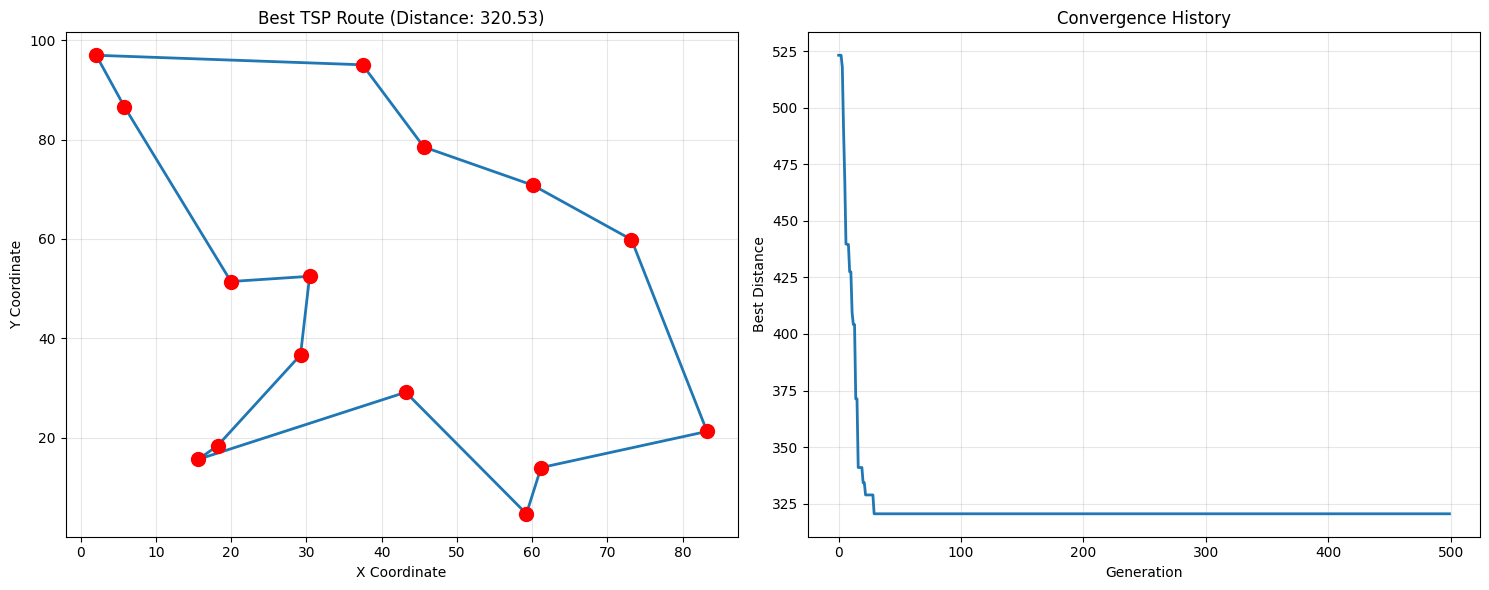

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt

class TSP_GA:
    def __init__(self, cities, population_size=50, mutation_rate=0.01, 
                 generations=1000):
        self.cities = cities
        self.n_cities = len(cities)
        self.pop_size = population_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        
    def create_individual(self):
        # Random permutation of cities
        individual = list(range(self.n_cities))
        random.shuffle(individual)
        return individual
    
    def create_population(self):
        return [self.create_individual() for _ in range(self.pop_size)]
    
    def distance(self, city1, city2):
        # Euclidean distance
        return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)
    
    def route_distance(self, route):
        total = 0
        for i in range(self.n_cities):
            city1 = self.cities[route[i]]
            city2 = self.cities[route[(i + 1) % self.n_cities]]
            total += self.distance(city1, city2)
        return total
    
    def fitness(self, route):
        return 1 / self.route_distance(route)
    
    def selection(self, population, fitnesses):
        # Tournament selection
        tournament_size = 3
        tournament = random.sample(list(zip(population, fitnesses)), tournament_size)
        tournament.sort(key=lambda x: x[1], reverse=True)
        return tournament[0][0]
    
    def crossover(self, parent1, parent2):
        # Ordered crossover (OX)
        size = self.n_cities
        child = [-1] * size
        
        # Select random segment
        start = random.randint(0, size - 1)
        end = random.randint(start + 1, size)
        
        # Copy segment from parent1
        child[start:end] = parent1[start:end]
        
        # Fill remaining from parent2
        pointer = 0
        for i in range(size):
            if child[i] == -1:
                while parent2[pointer] in child:
                    pointer += 1
                child[i] = parent2[pointer]
                pointer += 1
        
        return child
    
    def mutate(self, individual):
        # Swap mutation
        if random.random() < self.mutation_rate:
            i, j = random.sample(range(self.n_cities), 2)
            individual[i], individual[j] = individual[j], individual[i]
        return individual
    
    def evolve(self):
        population = self.create_population()
        best_distance = float('inf')
        best_route = None
        history = []
        
        for gen in range(self.generations):
            # Calculate fitness
            fitnesses = [self.fitness(ind) for ind in population]
            
            # Find best
            distances = [self.route_distance(ind) for ind in population]
            min_dist = min(distances)
            idx = distances.index(min_dist)
            
            if min_dist < best_distance:
                best_distance = min_dist
                best_route = population[idx]
            
            history.append(best_distance)
            
            # Create new population
            new_population = [best_route]  # Elitism
            
            while len(new_population) < self.pop_size:
                parent1 = self.selection(population, fitnesses)
                parent2 = self.selection(population, fitnesses)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child)
                new_population.append(child)
            
            population = new_population
            
            if gen % 100 == 0:
                print(f"Generation {gen}: Best Distance = {best_distance:.2f}")
        
        return best_route, best_distance, history

# Generate random cities
np.random.seed(42)
n_cities = 15
cities = np.random.rand(n_cities, 2) * 100

# Solve TSP with GA
print("Solving TSP using Genetic Algorithm...")
tsp_solver = TSP_GA(cities, population_size=100, mutation_rate=0.02, 
                    generations=500)
best_route, best_distance, history = tsp_solver.evolve()

print(f"\nBest route distance: {best_distance:.2f}")
print(f"Best route: {best_route}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot best route
route_coords = cities[best_route]
route_coords = np.vstack([route_coords, route_coords[0]])  # Return to start

ax1.plot(route_coords[:, 0], route_coords[:, 1], 'o-', linewidth=2)
ax1.scatter(cities[:, 0], cities[:, 1], c='red', s=100, zorder=5)
ax1.set_title(f'Best TSP Route (Distance: {best_distance:.2f})')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')
ax1.grid(True, alpha=0.3)

# Plot convergence
ax2.plot(history, linewidth=2)
ax2.set_title('Convergence History')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Best Distance')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Training SVM with linear kernel...
Accuracy: 0.689
Confusion Matrix:
[[15  0  0]
 [ 0  9  6]
 [ 0  8  7]]

Training SVM with poly kernel...
Accuracy: 0.689
Confusion Matrix:
[[14  1  0]
 [ 0 15  0]
 [ 0 13  2]]

Training SVM with rbf kernel...
Accuracy: 0.689
Confusion Matrix:
[[15  0  0]
 [ 0  9  6]
 [ 0  8  7]]

Training SVM with sigmoid kernel...
Accuracy: 0.778
Confusion Matrix:
[[15  0  0]
 [ 0  8  7]
 [ 0  3 12]]

Best kernel: sigmoid with accuracy: 0.778


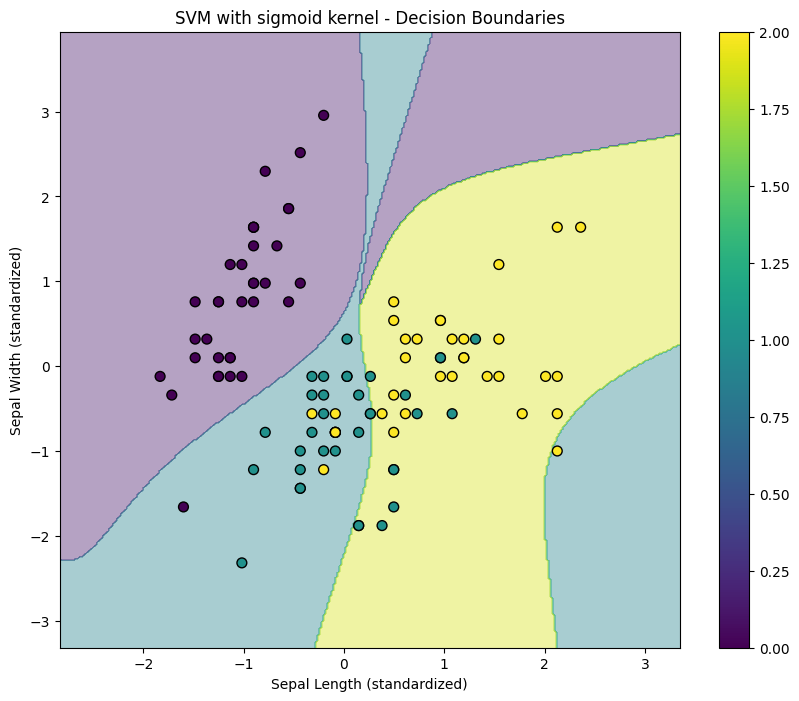

In [26]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only first two features for visualization
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    
    # Create and train SVM
    clf = svm.SVC(kernel=kernel, gamma='scale', C=1.0, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test_scaled)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=iris.target_names)
    
    results[kernel] = {
        'model': clf,
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'report': report
    }
    
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Confusion Matrix:\n{cm}")

# Visualization for best kernel
best_kernel = max(results, key=lambda k: results[k]['accuracy'])
best_model = results[best_kernel]['model']

print(f"\nBest kernel: {best_kernel} with accuracy: {results[best_kernel]['accuracy']:.3f}")

# Create mesh grid for decision boundary
h = 0.02  # Step size in mesh
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in mesh
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
            cmap='viridis', s=50, edgecolors='k')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title(f'SVM with {best_kernel} kernel - Decision Boundaries')
plt.colorbar()
plt.show()


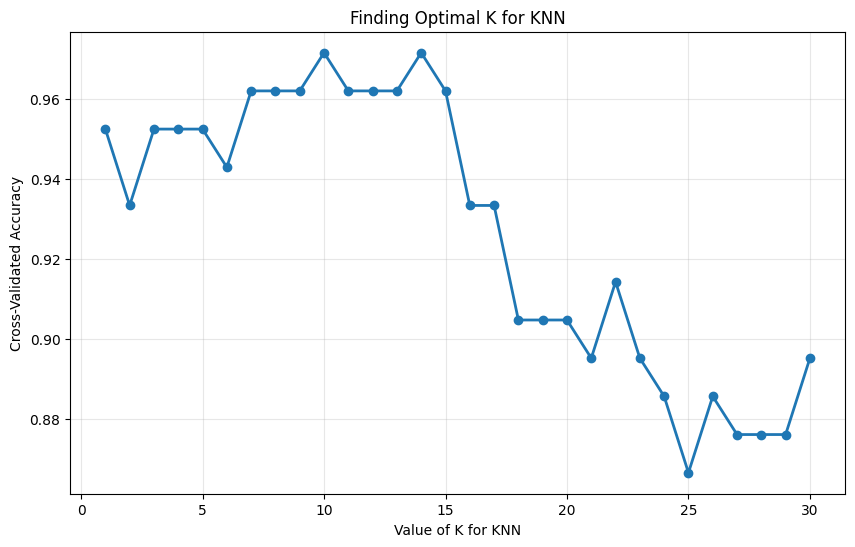

Optimal K: 14 with accuracy: 0.971

Test Accuracy: 0.956
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


New sample prediction: setosa


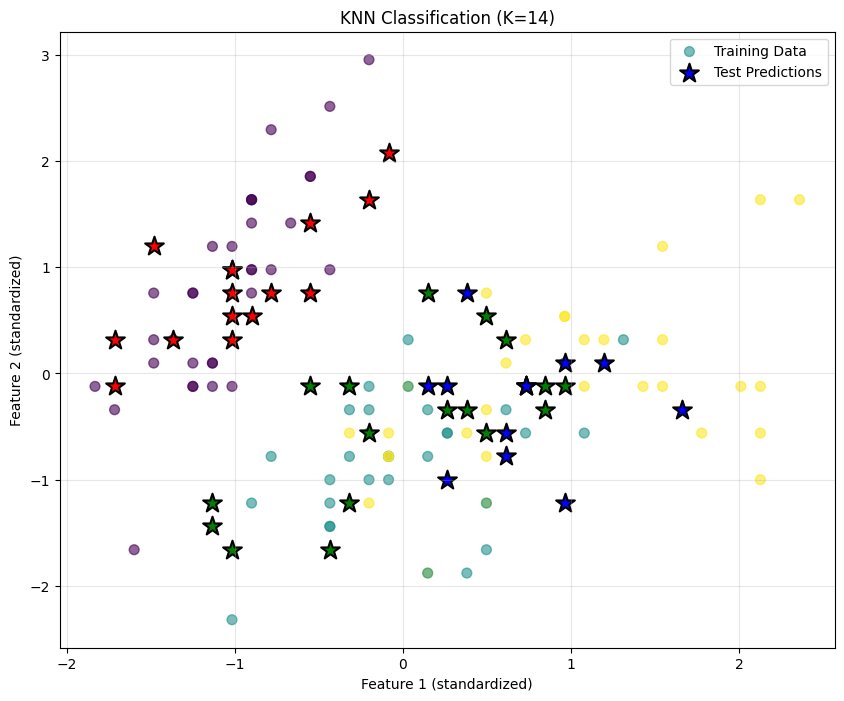

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find optimal k using cross-validation
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, 'o-', linewidth=2)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding Optimal K for KNN')
plt.grid(True, alpha=0.3)
plt.show()

# Best k
best_k = k_range[np.argmax(k_scores)]
print(f"Optimal K: {best_k} with accuracy: {max(k_scores):.3f}")

# Train with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"\nTest Accuracy: {accuracy:.3f}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{report}")

# Test on new sample
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Setosa sample
new_sample_scaled = scaler.transform(new_sample)
prediction = knn.predict(new_sample_scaled)
print(f"\nNew sample prediction: {iris.target_names[prediction[0]]}")

# Distance-based visualization for first two features
plt.figure(figsize=(10, 8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
            cmap='viridis', s=50, alpha=0.6, label='Training data')

# Plot test points with predictions
colors = ['red', 'green', 'blue']
for i in range(len(X_test_scaled)):
    plt.scatter(X_test_scaled[i, 0], X_test_scaled[i, 1], 
                c=colors[y_pred[i]], marker='*', s=200, 
                edgecolors='black', linewidth=1.5)

plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title(f'KNN Classification (K={best_k})')
plt.legend(['Training Data', 'Test Predictions'])
plt.grid(True, alpha=0.3)
plt.show()


Accuracy: 1.000
Confusion Matrix:
[[15  0]
 [ 0 15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Model Coefficients: [[ 0.84579129 -1.00398344  1.39479409  1.4247247 ]]
Model Intercept: [0.19790844]


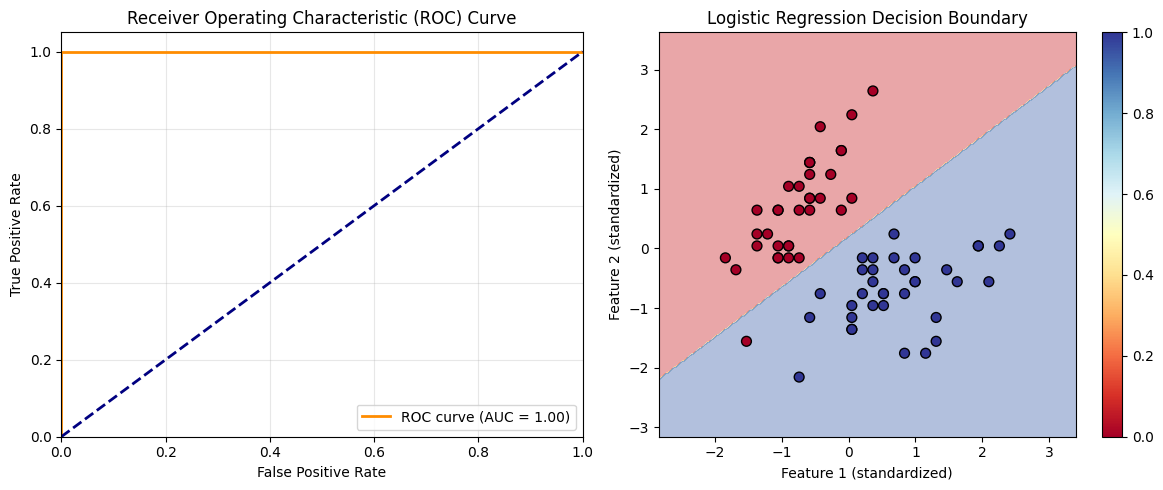


New sample probabilities: [[0.98290327 0.01709673]]
Predicted class: 0


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, auc)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# For binary classification demonstration, use only two classes
# (Logistic Regression inherently binary, but sklearn extends to multi-class)
X = X[y != 2]
y = y[y != 2]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
logreg = LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000, 
                            random_state=42)
logreg.fit(X_train_scaled, y_train)

# Get predictions and probabilities
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{report}")

print(f"\nModel Coefficients: {logreg.coef_}")
print(f"Model Intercept: {logreg.intercept_}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Plot decision boundary (using first two features)
plt.subplot(1, 2, 2)
h = 0.02  # Step size
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), 
                         yy.ravel(), 
                         np.zeros(xx.ravel().shape), 
                         np.zeros(xx.ravel().shape)])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
            cmap='RdYlBu', s=50, edgecolors='k')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar()

plt.tight_layout()
plt.show()

# Predict probability for new sample
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])
new_sample_scaled = scaler.transform(new_sample)
probabilities = logreg.predict_proba(new_sample_scaled)
prediction = logreg.predict(new_sample_scaled)

print(f"\nNew sample probabilities: {probabilities}")
print(f"Predicted class: {prediction[0]}")


Transaction Dataset (One-hot encoded):
   Bread  Butter   Eggs   Milk
0   True    True  False   True
1   True    True   True  False
2   True    True   True   True
3   True   False   True  False
4  False   False   True   True
5   True   False   True   True
6   True   False  False  False
7   True    True   True   True
8   True   False  False   True
9  False    True   True  False

Frequent Itemsets:
    support               itemsets  length
0       0.8                (Bread)       1
2       0.7                 (Eggs)       1
3       0.6                 (Milk)       1
1       0.5               (Butter)       1
5       0.5          (Bread, Eggs)       2
6       0.5          (Bread, Milk)       2
4       0.4        (Bread, Butter)       2
7       0.4         (Eggs, Butter)       2
9       0.4           (Milk, Eggs)       2
8       0.3         (Milk, Butter)       2
10      0.3  (Bread, Eggs, Butter)       3
11      0.3  (Bread, Milk, Butter)       3
12      0.3    (Bread, Milk, Eggs)       

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


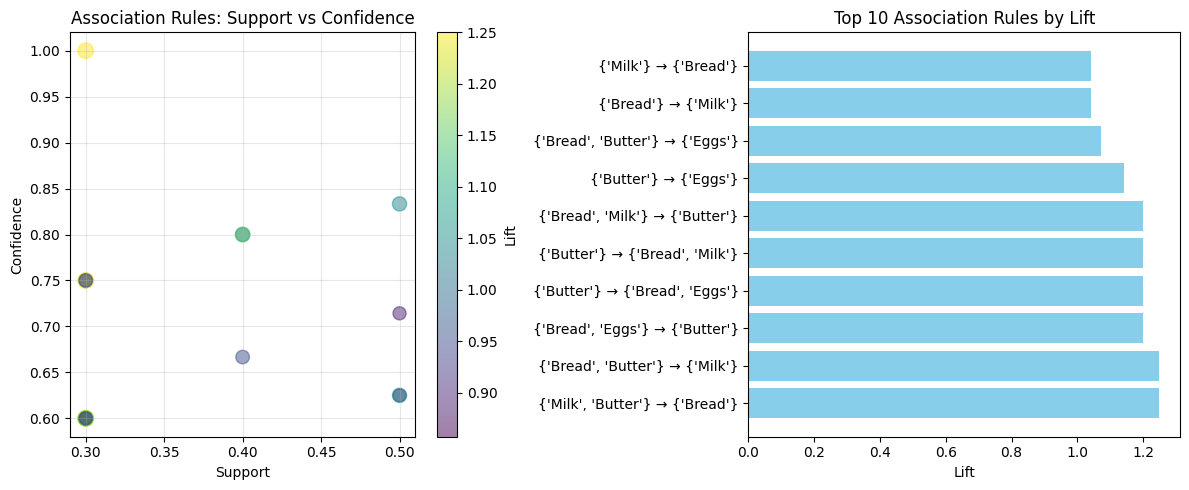


Actionable Insights from Association Rules:

Rule: {'Bread', 'Butter'} → {'Milk'}
  Support: 30.00% | Confidence: 75.00% | Lift: 1.25
  Insight: Customers who buy {'Bread', 'Butter'} are 75% likely to also buy {'Milk'}

Rule: {'Milk', 'Butter'} → {'Bread'}
  Support: 30.00% | Confidence: 100.00% | Lift: 1.25
  Insight: Customers who buy {'Milk', 'Butter'} are 100% likely to also buy {'Bread'}


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Sample transaction dataset
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Eggs'],
    ['Milk', 'Bread', 'Eggs', 'Butter'],
    ['Bread', 'Eggs'],
    ['Milk', 'Eggs'],
    ['Milk', 'Bread', 'Eggs'],
    ['Bread'],
    ['Milk', 'Bread', 'Butter', 'Eggs'],
    ['Milk', 'Bread'],
    ['Butter', 'Eggs']
]

# Convert to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

print("Transaction Dataset (One-hot encoded):")
print(df)

# Find frequent itemsets with min_support = 0.3
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print("\nFrequent Itemsets:")
print(frequent_itemsets.sort_values('support', ascending=False))

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

print("\nAssociation Rules (confidence >= 0.6):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Filter strong rules (lift > 1.2 and confidence > 0.7)
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.7)]

print("\nStrong Association Rules (lift > 1.2, confidence > 0.7):")
print(strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Visualization
plt.figure(figsize=(12, 5))

# Support vs Confidence scatter plot
plt.subplot(1, 2, 1)
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], 
            cmap='viridis', s=rules['lift']*100)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.grid(True, alpha=0.3)

# Top 10 rules by lift
plt.subplot(1, 2, 2)
top_rules = rules.sort_values('lift', ascending=False).head(10)
rule_labels = [f"{set(rule.antecedents)} → {set(rule.consequents)}" 
               for _, rule in top_rules.iterrows()]
y_pos = range(len(rule_labels))

plt.barh(y_pos, top_rules['lift'], color='skyblue')
plt.yticks(y_pos, rule_labels)
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.tight_layout()

plt.show()

# Generate actionable insights
print("\nActionable Insights from Association Rules:")
for idx, rule in strong_rules.iterrows():
    antecedents = set(rule['antecedents'])
    consequents = set(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']
    lift = rule['lift']
    
    print(f"\nRule: {antecedents} → {consequents}")
    print(f"  Support: {support:.2%} | Confidence: {confidence:.2%} | Lift: {lift:.2f}")
    print(f"  Insight: Customers who buy {antecedents} are {confidence:.0%} likely to also buy {consequents}")
    if lift > 1.5:
        print(f"  Action: Consider placing {antecedents} and {consequents} close together")


In [1]:
import numpy as np
class MADALINE:
    def __init__(self, topology, learning_rate=0.1):
        self.topology = topology  # e.g., [2, 3, 1] for 2 inputs, 3 hidden, 1 output
        self.lr = learning_rate
        self.weights = []
        self.biases = []
        
        # Initialize weights and biases
        np.random.seed(42)
        for i in range(len(topology)-1):
            w = np.random.uniform(-0.5, 0.5, (topology[i], topology[i+1]))
            b = np.random.uniform(-0.5, 0.5, topology[i+1])
            self.weights.append(w)
            self.biases.append(b)
    
    def activation(self, x):
        # Bipolar step function
        return np.where(x >= 0, 1, -1)
    
    def forward(self, X):
        activations = [X]
        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            a = self.activation(z)
            activations.append(a)
        return activations
    
    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            total_error = 0
            
            for i in range(len(X)):
                # Forward pass
                activations = self.forward(X[i:i+1])
                output = activations[-1]
                
                error = y[i] - output
                total_error += np.sum(np.abs(error))
                
                if np.any(error != 0):
                    # Backward pass - MADALINE Rule II
                    # For each layer, adjust weights of incorrectly responding neurons
                    for layer in range(len(self.weights)-1, -1, -1):
                        current_activation = activations[layer+1]
                        previous_activation = activations[layer]
                        
                        # Find incorrectly responding neurons
                        if layer == len(self.weights)-1:  # Output layer
                            incorrect = error != 0
                        else:
                            # For hidden layers, check if they contribute to error
                            incorrect = np.ones_like(current_activation, dtype=bool)
                        
                        # Update weights for incorrect neurons
                        for neuron in range(len(incorrect)):
                            if incorrect[neuron]:
                                self.weights[layer][:, neuron] += self.lr * y[i] * previous_activation[0]
                                self.biases[layer][neuron] += self.lr * y[i]
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Total Error: {total_error}")
            
            if total_error == 0:
                print(f"Converged at epoch {epoch}")
                break
    
    def predict(self, X):
        predictions = []
        for x in X:
            activations = self.forward(x.reshape(1, -1))
            predictions.append(activations[-1][0])
        return np.array(predictions)

# Test with XOR problem
print("Training MADALINE with variable topology for XOR...")

# XOR data
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
y = np.array([[-1], [1], [1], [-1]])

# Create MADALINE with topology 2-3-1
madaline = MADALINE(topology=[2, 3, 1], learning_rate=0.1)
madaline.train(X, y, epochs=1000)

# Test predictions
print("\nPredictions:")
predictions = madaline.predict(X)
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {predictions[i]}, Expected: {y[i][0]}")


Training MADALINE with variable topology for XOR...


/tmp/ipython-input-3849350606.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.biases[layer][neuron] += self.lr * y[i]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2]:
import numpy as np
def step_function(x):
    return 1 if x >= 0 else -1
def madaline_xor(learning_rate=0.5, epochs=100):
    # XOR training data (bipolar)
    X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
    y = np.array([-1, 1, 1, -1])  # XOR output
    # Initialize weights and biases for 2 ADALINEs
    np.random.seed(42)
    weights = np.random.uniform(-0.5, 0.5, (2, 2))
    biases = np.random.uniform(-0.5, 0.5, 2)
    print("Initial weights:", weights)
    print("Initial biases:", biases)
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            # Forward pass through ADALINEs
            hidden_outputs = []
            for j in range(2):
                net = np.dot(X[i], weights[j]) + biases[j]
                hidden_outputs.append(step_function(net))
            
            # Majority vote (or AND of outputs for XOR)
            final_output = 1 if sum(hidden_outputs) >= 0 else -1
            
            error = y[i] - final_output
            total_error += abs(error)
            
            if error != 0:
                # Update weights of incorrectly responding ADALINEs
                for j in range(2):
                    if hidden_outputs[j] != y[i]:
                        weights[j] += learning_rate * y[i] * X[i]
                        biases[j] += learning_rate * y[i]
        
        if total_error == 0:
            print(f"Converged at epoch {epoch+1}")
            break
    
    return weights, biases
# Train MADALINE for XOR
print("Training MADALINE for XOR Gate...")
weights, biases = madaline_xor(learning_rate=0.1, epochs=1000)
# Test the trained network
print("\nTesting MADALINE XOR Network:")
X_test = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
y_test = np.array([-1, 1, 1, -1])
for i in range(len(X_test)):
    hidden_outputs = []
    for j in range(2):
        net = np.dot(X_test[i], weights[j]) + biases[j]
        hidden_outputs.append(step_function(net))
    
    final_output = 1 if sum(hidden_outputs) >= 0 else -1
    print(f"Input: {X_test[i]}, Predicted: {final_output}, Expected: {y_test[i]}")


Training MADALINE for XOR Gate...
Initial weights: [[-0.12545988  0.45071431]
 [ 0.23199394  0.09865848]]
Initial biases: [-0.34398136 -0.34400548]
Converged at epoch 3

Testing MADALINE XOR Network:
Input: [1 1], Predicted: -1, Expected: -1
Input: [ 1 -1], Predicted: 1, Expected: 1
Input: [-1  1], Predicted: 1, Expected: 1
Input: [-1 -1], Predicted: -1, Expected: -1


In [3]:
import numpy as np
class Perceptron:
    def __init__(self, input_size, learning_rate=1.0, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.lr = learning_rate
        self.epochs = epochs
    
    def activation(self, x):
        return 1 if x >= 0 else -1  # Bipolar activation
    
    def predict(self, x):
        x = np.insert(x, 0, 1)  # Add bias term
        z = np.dot(self.weights, x)
        return self.activation(z)
    
    def train(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                total_error += abs(error)
                
                # Update weights
                self.weights[0] += self.lr * error * 1  # Bias update
                self.weights[1:] += self.lr * error * X[i]
            
            if total_error == 0:
                print(f'Converged at epoch {epoch+1}')
                break

# Training data for logic gates (bipolar: 1 for True, -1 for False)
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])

# AND Gate
print("Training AND Gate Perceptron...")
and_gate = Perceptron(input_size=2)
and_y = np.array([1, -1, -1, -1])  # AND truth table (bipolar)
and_gate.train(X, and_y)

print("AND Gate Predictions:")
for x in X:
    print(f"Input: {x}, Output: {and_gate.predict(x)}")

# OR Gate
print("\nTraining OR Gate Perceptron...")
or_gate = Perceptron(input_size=2)
or_y = np.array([1, 1, 1, -1])  # OR truth table (bipolar)
or_gate.train(X, or_y)

print("OR Gate Predictions:")
for x in X:
    print(f"Input: {x}, Output: {or_gate.predict(x)}")

# NAND Gate
print("\nTraining NAND Gate Perceptron...")
nand_gate = Perceptron(input_size=2)
nand_y = np.array([-1, 1, 1, 1])  # NAND truth table (bipolar)
nand_gate.train(X, nand_y)

print("NAND Gate Predictions:")
for x in X:
    print(f"Input: {x}, Output: {nand_gate.predict(x)}")

print(f"\nAND Gate weights: {and_gate.weights}")
print(f"OR Gate weights: {or_gate.weights}")
print(f"NAND Gate weights: {nand_gate.weights}")


Training AND Gate Perceptron...
Converged at epoch 3
AND Gate Predictions:
Input: [1 1], Output: 1
Input: [ 1 -1], Output: -1
Input: [-1  1], Output: -1
Input: [-1 -1], Output: -1

Training OR Gate Perceptron...
Converged at epoch 3
OR Gate Predictions:
Input: [1 1], Output: 1
Input: [ 1 -1], Output: 1
Input: [-1  1], Output: 1
Input: [-1 -1], Output: -1

Training NAND Gate Perceptron...
Converged at epoch 2
NAND Gate Predictions:
Input: [1 1], Output: -1
Input: [ 1 -1], Output: 1
Input: [-1  1], Output: 1
Input: [-1 -1], Output: 1

AND Gate weights: [-2.  2.  2.]
OR Gate weights: [2. 2. 2.]
NAND Gate weights: [ 2. -2. -2.]
